# SIT744 Assignment 2 (T2 2025)

Due: Week 7 Monday 8:00 pm (AEST)

This is an individual assignment. It contributes 30% to your final mark. Read the assignment instructions carefully.

## What to submit
By the due date, you are required to submit the following files to the corresponding Assignment (Dropbox) in CloudDeakin:

- **[YourID]_[UnitCode]_assignment2_solution.ipynb**: This is your Python notebook solution source file.
- **[YourID]_[UnitCode]_assignment2_output.pdf**: This is the output of your Python notebook solution exported in PDF format. (You may use [nbconvert](https://github.com/jupyter/nbconvert).)
- (HD Task only) A short (less than 5 minutes) screencast explaining your work (including study design, implementation, and main conclusions).
- Extra files required to complete your assignment, if any (e.g., images used in your answers).

For example, if your student ID is: 123456, and you are a SIT744 student, you will then need to submit the following files:

- 123456_SIT744_assignment2_solution.ipynb
- 123456_SIT744_assignment2_output.pdf

Please keep your answers short and to the point. Clean up your code outputs to reduce unnecessary information (e.g., excessively long training logs).



## Assignment objective

This assignment is for you to demonstrate the knowledge in deep learning that you have acquired from the lectures and practical lab materials. Most P-level tasks in this assignment are straightforward applications of the practical materials in weeks 1-5. Going through these materials before attempting this assignment is highly recommended.


This assignment consists of four sets of tasks with progressive level of challenges.

- Set 1 (P Tasks)
- Set 2 (C Tasks)
- Set 3 (D Tasks)
- Set 4 (HD Tasks)

Set 1 is labeled as P tasks because these demonstrate the minimum requirements of the unit. Concentrate on the P tasks first as these are the foundation for all the rest. As you move through sets 2, 3 and 4, the tasks become more challenging, with each allowing you to obtain the marks required to achieve the next achievement level (C, D, and HD respectively).

## Marking criteria
Indicative weights of various tasks are provided below, but your submission will be marked by the following criteria, adjusting for the overall quality.

### P-level expectation
- Showing good effort through completed tasks.
- Applying deep learning theory to design suitable deep learning solutions for the tasks.
- Demonstrating at least ‘Analysis’ level (Level 4) thinking in Bloom’s Taxonomy. This means you should not only implement the tasks but also examine, compare, and interpret results, explaining why certain decisions were made and what patterns or insights are revealed by your solution.

### C-level expectation
- Showing attention to detail through a good quality assignment report.

### D-level expectation
- Demonstrating creativity and resourcefulness in providing unique individual solutions.
- Critically evaluating and reflecting on the pros and cons of various design decisions.

### HD-level expectation
- Extending classroom learning to research and tackle previously unexplored theoretical questions or novel applications

**(Warning: Highly similar solutions will be investigated for collusion.)**


Run the following code before you start.

In [229]:
# import getpass
# import datetime
# import socket

# def generate_author_claim():
#     # Get current user
#     user = getpass.getuser()

#     # Get current timestamp
#     timestamp = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")

#     # Get current IP address
#     ip_address = socket.gethostbyname(socket.gethostname())

#     # Enter your name
#     name = input("Enter your full name: ")

#     # Enter your email address
#     email = input("Enter your email address: ")

#     # Enter your student ID
#     student_id = input("Enter your student ID: ")

#     # Generate author claim string
#     author_claim = f"Code authored by {user} ({name} {student_id} {email}) on {timestamp}  from IP address {ip_address}"

#     return author_claim

# # Generate the author claim string
# author_claim = generate_author_claim()

# # Print the author claim string
# print(author_claim)


### Import Modules

In [230]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, random_split, Dataset
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from torch.utils.tensorboard import SummaryWriter
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA


## **Set 1 (P Tasks) Construct a forward neural network**
*(weight ~60%)*

With this set of tasks, you are going to build a neural network for a classification task. You will train the model on a MIT-BIH Arrhythmia dataset that can be downloaded from the unit site. you can review [the paper](https://www.researchgate.net/publication/352809452_Harnessing_Artificial_Intelligence_for_Secure_ECG_Analytics_at_the_Edge_for_Cardiac_Arrhythmia_Classification) to understand this dataset better. 

### Task 1.1 Understanding the data

*(weight ~20%)*

---
### **Need Review**? What does the patterns mean? 
**1. Describe the dataset and target labels for the prediction task.** 
  * Examine training examples from each target class and **explain** any patterns you observe.
  * **Analyse** how these patterns might impact model training or the difficulty of classification.
---

**Answer**

<u>Examine training examples from each target class and **explain** any patterns you observe.</u>

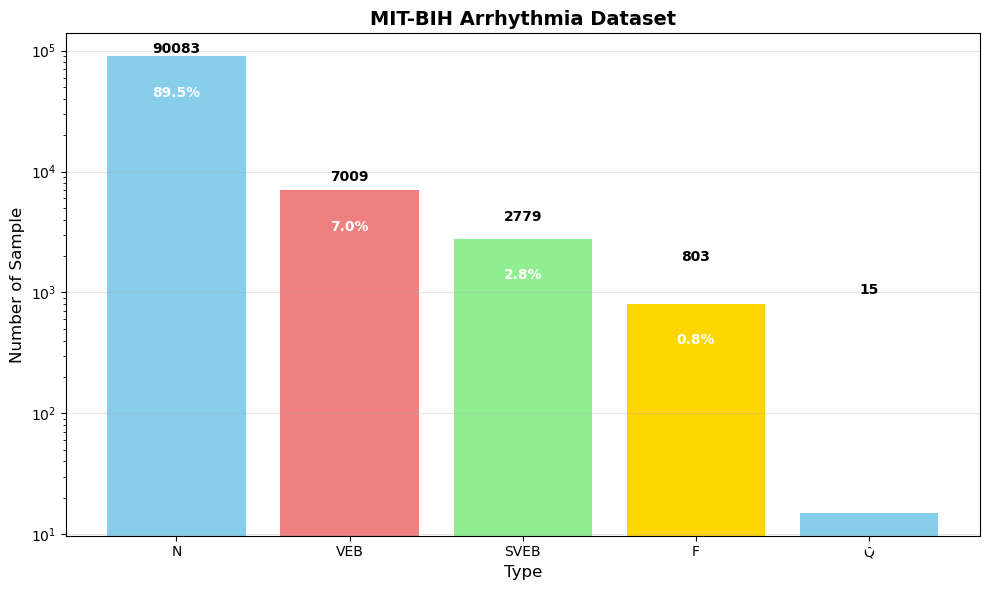

In [231]:
data_frame = pd.read_csv('data.csv')
# type = data_frame['type'].unique()
# patient = data_frame['record'].unique()

def plotDataDistribute(data_frame):
    plt.figure(figsize=(10, 6))
    class_counts = data_frame['type'].value_counts()
    bars = plt.bar(class_counts.index, class_counts.values, color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])

    # set value labels on top of each bar
    for bar, count in zip(bars, class_counts.values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(class_counts.values)*0.01, 
                str(count), ha='center', va='bottom', fontweight='bold')

    plt.title('MIT-BIH Arrhythmia Dataset', fontsize=14, fontweight='bold')
    plt.xlabel('Type', fontsize=12)
    plt.ylabel('Number of Sample', fontsize=12)
    plt.yscale('log')  # us log scale
    plt.grid(axis='y', alpha=0.3)

    # set percentage 
    total_samples = len(data_frame)
    for i, (class_name, count) in enumerate(class_counts.items()):
        percentage = (count / total_samples) * 100
        plt.text(i, count/2, f'{percentage:.1f}%', ha='center', va='center', 
                fontweight='bold', color='white', fontsize=10)

    plt.tight_layout()
    plt.show()

plotDataDistribute(data_frame)

**Analyze**

- This is ECG data used to classify the heartbeat disease. The dataset includes 4 classes, they are very imbalance when the largest target (N) has 90083 samples and smallest target (Q) has only 15 samples
- The Q class has very few examples, which makes it difficult for the model to learn meaningful patterns. Overall, the dataset is highly imbalanced, which may bias the model towards predicting the majority class (N).

---

**2. Describe the data types of each feature. What preprocessing steps are required? Why?**



**Answer**

<u>Describe the data types of each feature.</u>
- This code is used to check data types of each feature

In [232]:
data_type_frame = {}
for feature, dataType in data_frame.dtypes.items():
    data_type_frame[feature] = str(dataType)
data_type_frame = pd.DataFrame([data_type_frame])
data_type_frame.head()

,record,type,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,...,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
0,int64,object,int64,float64,float64,float64,float64,float64,float64,int64,...,float64,int64,int64,int64,int64,float64,float64,float64,float64,float64


As we can see in this dataset, we have only one categorical feature (type) and remain features are numeric

<u>What preprocessing steps are required? Why?</u>

1. Label Encoding: 
    - Convert categorical labels ('N' 'Q' 'SVEB' 'VEB' 'F') to numeric format (0, 1, 2, 3) for neural network training.
    - reason: because neural network and ML work well with numeric

2. Feature Normalization/Standardization: 
    - Reason: to ensure all features contribute equally, prevents features with larger magnitudes from dominating the learning process

3. Handle Class Imbalance:
    - As we can see above our data is extreme imbalance (N: 90,083 vs Q: 15 samples). In [the paper](https://www.researchgate.net/publication/352809452_Harnessing_Artificial_Intelligence_for_Secure_ECG_Analytics_at_the_Edge_for_Cardiac_Arrhythmia_Classification) they use up-sample to balance the data. I think that is not good because with up-sample method, it just randomly duplicate samples from minority classes, so I will choose SMOTE method which generates synthetic samples by interpolating between existing minority class samples.
    - Without balance data, our model will bias toward majority class 'N'

4. Feature Selection:
    - Remove features like patient IDs because it is non-informative for classify

5. Apply PCA:
    - remove noise data which usually happen in medical data like ECG signal or IoT data
    - Better generalization and reduced overfitting 

--- 

**3. Prepare the data for learning a neural network, including preprocessing, creating training, validation, and test datasets. How many training examples and how many test examples are you using?**

**Answer**

<u>Process Data</u>

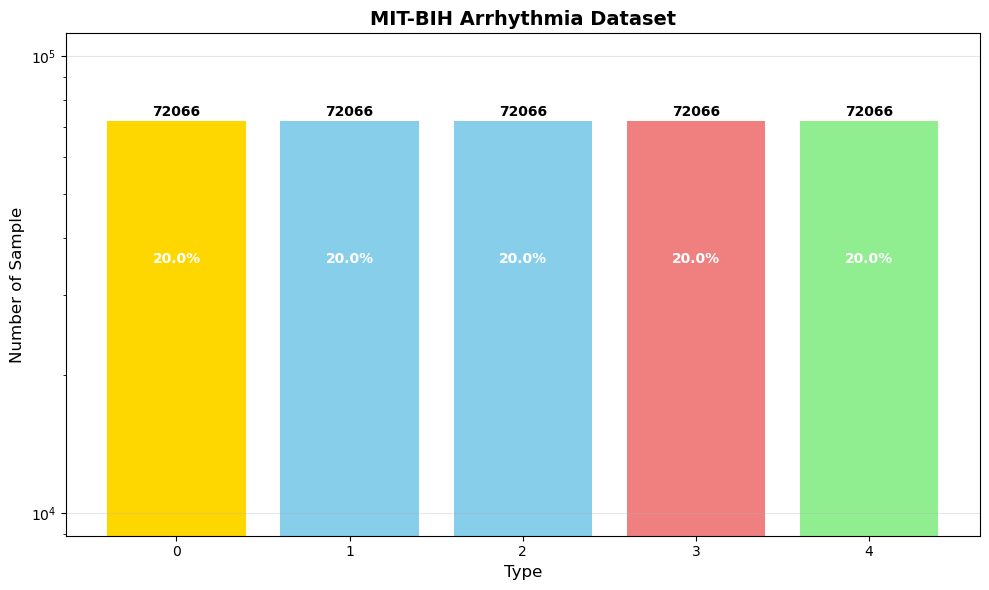

In [233]:
# features selection (remove the patient ID column)
data_frame_processed = data_frame.drop(['record'], axis=1)
# label categorical data
data_frame_processed['type'] = LabelEncoder().fit_transform(data_frame_processed['type'])
# normalize data
scaler = StandardScaler()
feature_x_raw = data_frame_processed.drop(['type'], axis=1)
feature_x_scaled = pd.DataFrame(scaler.fit_transform(feature_x_raw), columns= feature_x_raw.columns)
target_y = data_frame_processed['type']
# split data to apply pca and balance data
x_all = feature_x_scaled.values.astype(np.float32)  # original scaled 
y_all = target_y.values.astype(np.int64)
x_train_raw, x_temp, y_train_raw, y_temp = train_test_split(x_all, y_all, test_size=0.2, random_state=42, stratify=y_all) # float64 is highest type in the original features
x_val, x_test, y_val, y_test = train_test_split( x_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp) #because in the original data, the target column has type int64
#apply PCA on train data
pca = PCA(n_components=0.95, random_state=42) # keep 95%
x_train_pca = pca.fit_transform(x_train_raw) # find cosin before transform
x_val_pca = pca.transform(x_val)
x_test_pca = pca.transform(x_test)

# apply SMOTE only for training set, we should not apply SMOTE for test data
x_train_final, y_train_final = SMOTE(random_state=42).fit_resample(x_train_pca, y_train_raw)
# create a DataFrame to reuse the plotDataDistribute function 
df_train_plot = pd.DataFrame(x_train_final)
df_train_plot['type'] = y_train_final
plotDataDistribute(df_train_plot)

<u>Creating training, validation, and test datasets</u>

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, x, y):
        self.x = torch.from_numpy(x.astype(np.float32))
        self.y = torch.from_numpy(y.astype(np.int64))
    def __len__(self):
        return len(self.x)
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

train_ds = CustomDataset(x_train_final, y_train_final)
val_ds   = CustomDataset(x_val_pca, y_val)
test_ds  = CustomDataset(x_test_pca, y_test)
batch_size = 64
train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size=batch_size)
test_loader  = DataLoader(test_ds, batch_size=batch_size)
print(f"Number of train dataset (after SMOTE): {len(train_ds)}\nNumber of validation dataset: {len(val_ds)}\nNumber of  test dataset: {len(test_ds)}")

Number of train dataset (after SMOTE): 360330
Number of validation dataset: 10069
Number of  test dataset: 10069


---

### Task 1.2 Setting up a model for training

Construct a deep feedforward neural network. Justify your model design decisions.

**Answer**

In [235]:
class MyNet(nn.Module):
    def __init__(self, size_of_input, number_class):
        super(MyNet, self).__init__()
        self.unit_1 = nn.Linear(size_of_input, 256)
        self.unit_2 = nn.Linear(256, 128)
        self.unit_3 = nn.Linear(128, 64)
        self.unit_4 = nn.Linear(64, number_class)
    
    def forward(self, x):
        x = F.relu(self.unit_1(x))
        x = F.relu(self.unit_2(x))
        x = F.relu(self.unit_3(x))
        x = self.unit_4(x) 
        return x

Output Layer

- **How many output nodes?**
  - 4 nodes (one for each class: N, Q, SVEB, VEB)
  - Determined by `number_class = len(np.unique(y_train_final))` after label encoding

- **Which activation function?**
  - No activation function (Linear output) because the loss function CrossEntropyLoss() internally applies softmax, so adding softmax to the output layer would result in double softmax application, leading to poor performance

Hidden Layers

- **How many hidden layers?**
  - 3 hidden layers (`unit_1`, `unit_2`, `unit_3`)

- **How many nodes in each layer?**
  - Layer 1: 256 nodes  
  - Layer 2: 128 nodes  
  - Layer 3: 64 nodes  

- **Which activation function for each layer?**
  - ReLU (`F.relu`) for all hidden layers
  - **Justification**:
    - ReLU is computationally efficient and helps with vanishing gradient problem
    - Works well with your standardized ECG data
    - Provides non-linearity while maintaining training stability
    
Input Layer

- **What is the input size?**
  - Dynamic size: `X_train_final.shape[1]` (number of PCA components)

- **Do you need to reshape the input? Why?**
  - No reshaping needed
  - **Reason**:
    - My data is already in the correct format, each sample is a 1D vector of features


Plot Model Structure using `torchsummary`

In [236]:
from torchsummary import summary
# create model instance
input = x_train_final.shape[1]
number_class = len(np.unique(y_train_final))
model = MyNet(input, number_class)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
summary(model, (x_train_final.shape[1],))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 256]           3,840
            Linear-2                  [-1, 128]          32,896
            Linear-3                   [-1, 64]           8,256
            Linear-4                    [-1, 5]             325
Total params: 45,317
Trainable params: 45,317
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.17
Estimated Total Size (MB): 0.18
----------------------------------------------------------------


---

### Task 1.3 Fitting the model

**Answer**



<u>Report the settings</u>

The loss function: 
- Choice: nn.CrossEntropyLoss()
    - Role in Model Fitting:
        - Combines LogSoftmax and NLLLoss in one class
        - Suitable for multi-class classification (4 ECG arrhythmia classes)
        - Provides strong penalty for confident wrong predictions
- The metrics for model evaluation is `accuracy`

Optimizer Selection:
- Choice: torch.optim.Adam
- Justification:
    - Adaptive learning rates for each parameter
    - Works well with sparse gradients (common in medical data)
    - Less sensitive to hyperparameter tuning

Training Hyperparameters:
1. Training Batch Size: 64
- Justification: balanced memory usage and training stability
    Good compromise between SGD (batch_size=1) and full batch
    Provides stable gradient estimates for Adam optimizer
2. Number of Training Epochs: 100
- Justification: sufficient for convergence on ECG classification
    Allows monitoring for overfitting through validation metrics
    Can stop early based on validation performance
3. Learning Rate: 0.01
- No Momentum: Adam has built-in momentum-like behavior
- No Learning Rate Schedule: Using fixed learning rate initially
- Justification: standard starting point for Adam optimizer
    Will monitor training curves to adjust if needed


<u> Fit the model </u>

In [ ]:
writer = SummaryWriter(log_dir=f"runs/experiment_initial") # write log

class TrainModel():
    def __init__(self, neural_model, device, criterion, optimizer, scheduler=None):
        self.neural_model = neural_model
        self.criterion = criterion
        self.optimizer = optimizer 
        self.device = device
        self.scheduler = scheduler

    def train(self, train_loader):
        self.neural_model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        for batch_id, (data, target) in enumerate(train_loader):
            data, target = data.to(self.device), target.to(self.device)
            
            self.optimizer.zero_grad() #clear previous gradient
            output = self.neural_model(data)
            loss = self.criterion(output, target) #if confidence is high and prediction is wrong -> high penalty
            loss.backward() 
            self.optimizer.step() #update weight
            
            running_loss += loss.item()
            _, predicted = torch.max(output.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()
        
        epoch_loss = running_loss / len(train_loader)
        epoch_acc = 100 * correct / total
        return epoch_loss, epoch_acc

    def validate(self, val_loader):
        self.neural_model.eval() # switch to evaluation mode (turn OFF the dropout layers ...)
        val_loss = 0.0
        correct = 0
        total = 0
        
        with torch.no_grad():
            for data, target in val_loader:
                data, target = data.to(self.device), target.to(self.device)
                output = self.neural_model(data)
                val_loss += self.criterion(output, target).item()
                _, predicted = torch.max(output.data, 1)
                total += target.size(0)
                correct += (predicted == target).sum().item()
        
        val_loss /= len(val_loader)
        val_acc = 100 * correct / total
        return val_loss, val_acc
    
    def train_epoch(self, num_epochs, writer = None):
        train_losses = []
        train_accuracies = []
        val_losses = []
        val_accuracies = []
        learning_rates = []
        for epoch in range(num_epochs):
            train_loss, train_acc = self.train(train_loader)
            val_loss, val_acc = self.validate(val_loader)
            
            if self.scheduler is not None:
                if isinstance(self.scheduler, torch.optim.lr_scheduler.ReduceLROnPlateau):
                    self.scheduler.step(val_loss)  #  validation loss for ReduceLROnPlateau
                else:
                    self.scheduler.step()  #other schedulers
            #track learning rate
            current_lr = self.optimizer.param_groups[0]['lr']
            learning_rates.append(current_lr)
            
            train_losses.append(train_loss)
            train_accuracies.append(train_acc)
            val_losses.append(val_loss)
            val_accuracies.append(val_acc)
            print(f'Epoch {epoch+1}/{num_epochs}: Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, Validate Loss: {val_loss:.4f}, Validate Acc: {val_acc:.2f}%')
            if writer is not None:
                if self.scheduler is not None:
                    writer.add_scalars('Loss_Comparison', {'Train': train_loss, 'Validation': val_loss}, epoch)
                    writer.add_scalars('Accuracy_Comparison', {'Train': train_acc, 'Validation': val_acc}, epoch)
                else:    
                    writer.add_scalars('Loss_Comparison', {'Train': train_loss, 'Validation': val_loss}, epoch)
                    writer.add_scalars('Accuracy_Comparison', {'Train': train_acc, 'Validation': val_acc}, epoch)
        return train_losses, train_accuracies, val_losses, val_accuracies, learning_rates


model = MyNet((x_train_final).shape[1], len(np.unique(y_train_final)))
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
loss_function = nn.CrossEntropyLoss()
gradient_strategy = torch.optim.Adam(model.parameters(), lr=0.01)
train_model = TrainModel(model, device, loss_function, gradient_strategy)
train_losses, train_accuracies, val_losses, val_accuracies, learning_rate = train_model.train_epoch(num_epochs= 100, writer= writer)
writer.flush()
writer.close()

**Run test set**

In [246]:
test_loss, test_acc = train_model.validate(test_loader)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}%')

Test Loss: 0.0762, Test Accuracy: 97.53%


In [247]:
%load_ext tensorboard
%tensorboard --logdir runs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 86998), started 1:01:42 ago. (Use '!kill 86998' to kill it.)

<u>**How did you decide when to stop training?**</u>

- To decide when to stop training, I compared the training loss with the validation loss. I set an early stopping patience of 5 epochs, meaning that within these 5 epochs the training loss could still improve while the validation loss might fluctuate. However, if after 6 epochs the training loss continues to improve but the validation loss does not, I stop training because this indicates that the model has started to overfit.

---

## **Set 2 (C Tasks) Improve the model**
### Task 2.1 Check the training using visualisation

Visualise the training process (e.g., using TensorBoard). Show screenshots of visualisation.




In [241]:
%load_ext tensorboard
%tensorboard --logdir runs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 86998), started 0:00:03 ago. (Use '!kill 86998' to kill it.)

### Screenshot of visualisation

<img src="acc_loss2.png" alt="Accuracy plot" width="600"/>
<img src="over_loss.png" alt="Accuracy plot" width="600"/>


**Comment Overfitting**

- Looking at the loss chart (validation and training), we can see that the model is overfitting. I set a patience of 5 epochs. The validation loss fluctuated from epoch 2 to 7, and after that, it did not improve, while the training loss kept improving. Therefore, we can stop training at epoch 7.


### Task 2.2 Apply regularisation

Improve the training process by applying regularisation.

**1. Setup class**

- I created three classes to compare the effectiveness of each regularization:
    - `MyNetBatchNorm`: applies only batch normalization
    - `MyNetDropout`: applies only dropout
    - `MyNetImprove`: applies both dropout and batch normalization

In [252]:
class MyNetImprove(nn.Module):
    def __init__(self, size_of_input, number_class):
        super(MyNetImprove, self).__init__()
        self.unit_1 = nn.Linear(size_of_input, 256)
        self.bn1 = nn.BatchNorm1d(256)
        self.unit_2 = nn.Linear(256, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.unit_3 = nn.Linear(128, 64)
        self.bn3 = nn.BatchNorm1d(64)
        self.unit_4 = nn.Linear(64, number_class)
        self.dropout = nn.Dropout(p=0.5)  # Dropout for regularization
    
    def forward(self, x):
        # linear -> batch norm -> active funtion
        x = self.unit_1(x)
        x = self.bn1(x)
        x = F.relu(x)
        x = self.dropout(x)
        
        x = self.unit_2(x)
        x = self.bn2(x)
        x = F.relu(x)
        x = self.dropout(x)
        
        x = self.unit_3(x)
        x = self.bn3(x)
        x = F.relu(x)
        x = self.dropout(x)
        x = self.unit_4(x)
        return x
    
class MyNetBatchNorm(nn.Module):
    def __init__(self, size_of_input, number_class):
        super(MyNetBatchNorm, self).__init__()
        self.unit_1 = nn.Linear(size_of_input, 256)
        self.bn1 = nn.BatchNorm1d(256)
        self.unit_2 = nn.Linear(256, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.unit_3 = nn.Linear(128, 64)
        self.bn3 = nn.BatchNorm1d(64)
        self.unit_4 = nn.Linear(64, number_class)
    
    def forward(self, x):
        x = self.unit_1(x)
        x = self.bn1(x)
        x = F.relu(x)
        
        x = self.unit_2(x)
        x = self.bn2(x)
        x = F.relu(x)
        
        x = self.unit_3(x)
        x = self.bn3(x)
        x = F.relu(x)
        
        x = self.unit_4(x)
        return x

class MyNetDropout(nn.Module):
    def __init__(self, size_of_input, number_class, dropout_rate=0.5):
        super(MyNetDropout, self).__init__()
        self.unit_1 = nn.Linear(size_of_input, 256)
        self.unit_2 = nn.Linear(256, 128)
        self.unit_3 = nn.Linear(128, 64)
        self.unit_4 = nn.Linear(64, number_class)
        self.dropout = nn.Dropout(p=dropout_rate)
    
    def forward(self, x):
        x = F.relu(self.unit_1(x))
        x = self.dropout(x)
        x = F.relu(self.unit_2(x))
        x = self.dropout(x)
        x = F.relu(self.unit_3(x))
        x = self.dropout(x)
        x = self.unit_4(x)
        return x

**2. Run Experiment**

In [ ]:
# experiment setup
input_size = x_train_final.shape[1]
num_classes = len(np.unique(y_train_final))
num_epochs = 100

#  models list
models = {
    'Dropout': MyNetDropout(input_size, num_classes),
    'BatchNorm': MyNetBatchNorm(input_size, num_classes),
    'Combined': MyNetImprove(input_size, num_classes)
}

for model_name, model in models.items():
    model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    trainer = TrainModel(model, device, nn.CrossEntropyLoss(), optimizer)
    writer = SummaryWriter(log_dir=f"runs/model_experiment_{model_name.lower()}")
    train_losses, train_accuracies, val_losses, val_accuracies, learning_rates = trainer.train_epoch(
        num_epochs=num_epochs, writer=writer
    )
    test_loss, test_acc = trainer.validate(test_loader)
    print(f"{model_name} - Final Test Accuracy: {test_acc:.2f}%")
    writer.flush()
    writer.close()

In [254]:
%load_ext tensorboard
%tensorboard --logdir runs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 86998), started 2:24:08 ago. (Use '!kill 86998' to kill it.)

**3. Comment**

Looking at the TensorBoard results, we can see that applying only batch normalization does not fix the overfitting. Applying only dropout helps reduce overfitting, but the performance is not as good compared to the `MyNetImprove` class, which applies both batch normalization and dropout.

The experimental results demonstrate that different regularization techniques address distinct aspects of the training process:

1. Batch Normalization: Batch normalization makes training more stable and helps the model learn faster. However, it does not give enough regularization for the complex task of ECG classification. We can see this because the training loss keeps going down, while the validation loss go up, showing signs of overfitting.
2. Dropout Alone: Dropout gives strong regularization by randomly turning off some neurons during training. This reduces overfitting and makes the model more robust. But without batch normalization, the training is less stable and may take longer to reach the best results.
3. Combined Approach: Using both batch normalization and dropout together gives the best performance. Batch normalization makes training stable and efficient for learning ECG signal patterns, while dropout controls overfitting and improves generalization. This balance helps the model work better on unseen arrhythmia cases.


**4. Screenshot of the loss chart**

1. Only Batch Normalization

<img src="only_batch.png" alt="Accuracy plot" width="600"/>

2. Dropout Alone

<img src="only_dropout.png" alt="Accuracy plot" width="600"/>

3. Combined Approach

<img src="combine.png" alt="Accuracy plot" width="600"/>


## **Set 3 (D Tasks) Analyse the learned representations**

(weight ~ 10%)

In this task, you will explore the visualization of embeddings at different layers of your trained neural network and analyse how they evolve using **Uniform Manifold Approximation and Projection** ([UMAP](https://github.com/lmcinnes/umap)). Below are detailed steps you can follow.

1. Select a subset of your training data containing both classes.
2. Extract the embeddings from each layer of the neural network model for the dataset.
3. Apply UMAP to visualise the embeddings from each layer in a 2-dimensional space, highlighting different classes with distinct colours or markers. Include appropriate labels and legends in your plots.
4. Analyse and discuss the evolution of the embeddings across layers. Answer the following questions in your analysis:

  - Do the embeddings show a clear separation between classes at any specific layer?
  - How do the separation and clustering of classes change as you move across layers?
  - Are there any notable changes in the distribution or structure of the embeddings?
  - Are there any layers where the embeddings become less discriminative or more entangled?

5. Summarize your findings and provide insights into the behaviour of the neural network's representations at different layers. Discuss the implications of the observed changes in the embeddings for the network's ability to capture class-specific information and make predictions.



## **Set 4 (HD Tasks) Investigating Neural Collapse in Deep Learning**

*(weight ~20%)*

In this research task, you will explore the phenomenon of "neural collapse" in deep learning models. Additionally, you must identify meaningful research gaps or failure cases that arise from the literature or your own experiments.


### Task 4.1 Examine layer rotation with Layca

1. Reproduce experiments described in the paper [Layer rotation: a surprisingly powerful indicator of generalization in deep networks?](https://arxiv.org/abs/1806.01603),  Compare the results you obtained with the ones in the paper. Do you identify any discrepancies?

2. What connections do you discover between the paper and what you have learnt in the unit?

### Task 4.2 Design and Develop Your Own ML Solution
1. Design and develop your own deep learning solution using CIFAR dataset. The proposed solution must be substantially different from the approaches presented in the article. However, this does not mean you are required to choose a new ML algorithm. You can develop a novel solution by changing the feature
selection approach, using different preprocessing techniques, exploring alternative model combinations, or restructuring the training pipeline. The goal is to propose a system that is meaningfully distinct from the authors' method.
Your technical report must include:
* A clear motivation for the proposed solution
* A description of how your method differs from the article
* A well-structured experimental protocol
* Evaluation using Accuracy, Precision, Recall, F1 Score, and AUC.

### Deliverables for HD Tasks

* Written submission (Max 4 pages): Summarize your approach to reproducing the experiments, key findings, and critical observations. Clearly articulate the research gaps or failure cases you identified.
* Link to reproducible code
* Short video presentation (Max 5 minutes): Highlight your main conclusions about neural collapse.
Discuss the most pressing research gaps or failure cases and how addressing them could push the field forward.

---

### End of Assignment 2

---

### need check

validation set

drop out

Batch normal

Weight decay

tensor board 

**show that augmentation can advoid overfiting**